In [2]:
# !pip install sqlalchemy
# !pip install ibm_db_sa
# !pip install ipython-sql


In [3]:
%load_ext sql

In [4]:
import csv, sqlite3

con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [5]:
%sql sqlite:///SQLiteMagic.db

In [6]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57)

 * sqlite:///SQLiteMagic.db
(sqlite3.OperationalError) table INTERNATIONAL_STUDENT_TEST_SCORES already exists
[SQL: CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [7]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * sqlite:///SQLiteMagic.db
Done.


country,first_name,last_name,test_score


In [8]:
test_score_distribution = %sql SELECT test_score as "Test_Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite:///SQLiteMagic.db
Done.


Test_Score,Frequency
46,1
48,1
49,2
51,1
53,1
54,1
55,1
57,1


In [17]:
# !pip install pandas
# !pip install seaborn

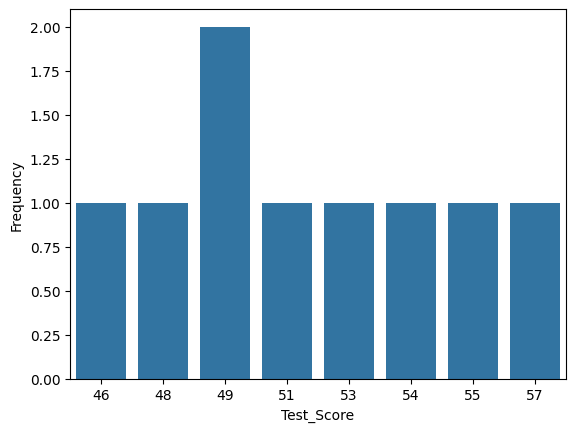

In [18]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline

import seaborn

plot = seaborn.barplot(x='Test_Score',y='Frequency', data=dataframe)